In [2]:
from manim import *

Manim Community v0.19.0

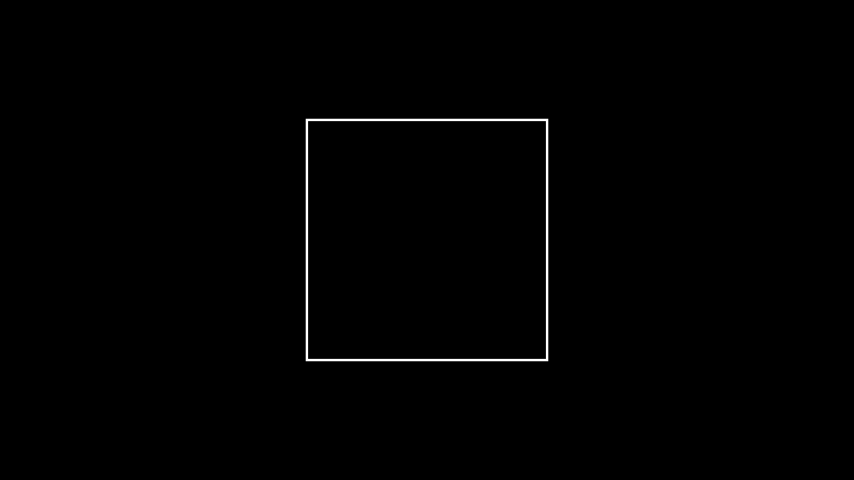

In [2]:
%%manim -v WARNING --disable_caching -ql -s Test1

class Test1(Scene):
    def construct(self):
        config.pixel_width = 300

        box = Rectangle(width=4, height=4, color=WHITE)
        self.add(box)

In [3]:
%%manim -v WARNING --disable_caching -ql Test2

class Test2(Scene):
    def construct(self):
        plane = NumberPlane(x_length=14, y_length=8)
        plane.add_coordinates()
        box = Rectangle(stroke_color=GREEN_C, stroke_opacity=0.7, fill_color=RED_B, fill_opacity=0.5, height=1, width=1)
        dot = Dot(color=WHITE)
        dot.add_updater(lambda d: d.move_to(box.get_center()))

        self.add(plane)
        self.add(box)
        self.add(dot)
        self.play(box.animate.shift(RIGHT*2), run_time=2)
        self.play(box.animate.shift(UP*3), run_time=2)
        self.play(box.animate.shift(DOWN*5+LEFT*5), run_time=2)
        self.play(box.animate.shift(UP*1.5+RIGHT*1), run_time=2)

Manim Community v0.19.0

In [4]:
%%manim -v WARNING --disable_caching -ql Updaters

from manim import *

class Updaters(Scene):
    def construct(self):
        rectangle = RoundedRectangle(stroke_width=8, stroke_color=WHITE, fill_color=BLUE_B, width=4.5, height=2).shift(UP*3+LEFT*4)

        math_text = MathTex("\\frac{3}{4} = 0.75").set_color_by_gradient(GREEN, PINK).set_height(1.5)
        math_text.move_to(rectangle.get_center())
        math_text.add_updater(lambda x : x.move_to(rectangle.get_center()))

        self.play(FadeIn(rectangle))
        self.play(Write(math_text))
        self.play(rectangle.animate.shift(RIGHT*1.5+DOWN*5), run_time=6)
        self.wait()
        math_text.clear_updaters()
        self.play(rectangle.animate.shift(LEFT*2+UP*1), run_time=6)

Manim Community v0.19.0

<string>:8: DeprecationWarning: This method is not guaranteed to stay around. Please prefer setting the attribute normally or with Mobject.set().


Manim Community v0.19.0

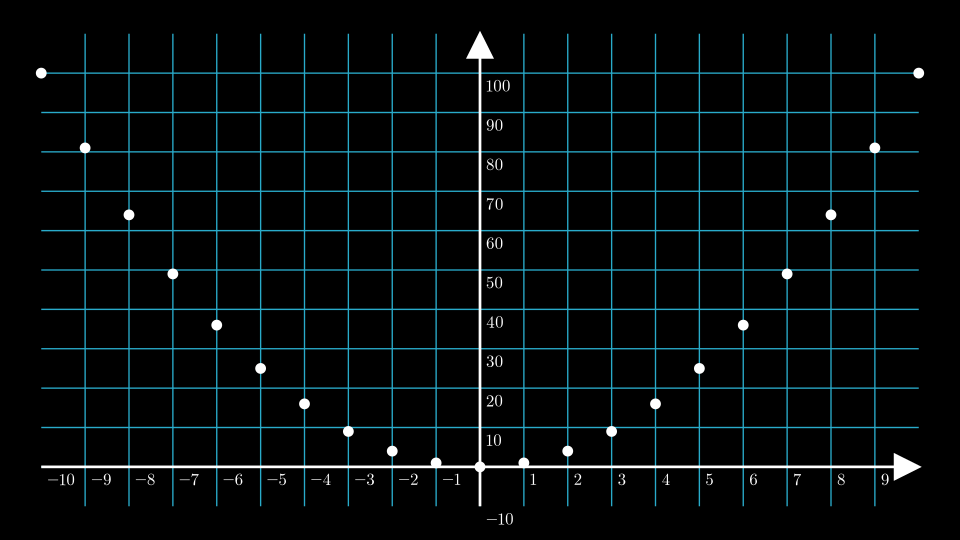

In [6]:
%%manim -v WARNING --disable_caching -ql -r 960,540 -s ex_2_5

class ex_2_5(Scene):
    def construct(self):
        config.pixel_width = 300

        '''
        axes = Axes(
            x_range=[-10, 10, 1],
            y_range=[-10, 110, 10],
            axis_config={
                "include_numbers": True,
                "include_tip": True,
                "stroke_width":4,
            },
        )
        axes.add_coordinates()
        '''

        axes = NumberPlane(
            x_range=[-10, 10, 1],
            y_range=[-10, 110, 10],
            x_length=13,
            y_length=7,
            axis_config={
                "include_numbers": True,
                "include_tip": True,
                "stroke_width":4,
            },
        )

        dots = [Dot(axes.c2p(x,x**2,0), color=WHITE) for x in range(-10,11)]

        dot_group = VGroup(*dots)

        self.add(axes, dot_group)


Manim Community v0.19.0

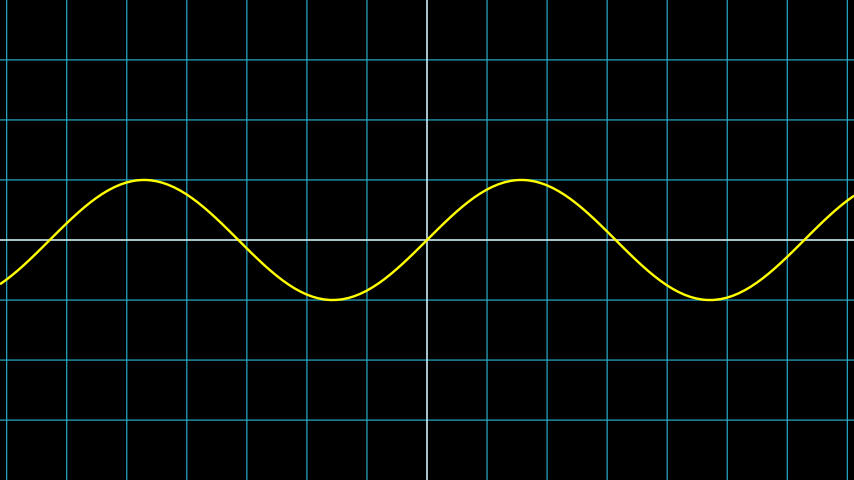

In [7]:
%%manim -v WARNING --disable_caching -ql -s plane_test

class plane_test(Scene):
    def construct(self):
        config.pixel_width = 300

        plane = NumberPlane()
        axes = plane.get_axes()
        graph = plane.plot(
            lambda x: np.sin(x),
            color=YELLOW
        )

        self.add(plane, graph)
        

Manim Community v0.19.0

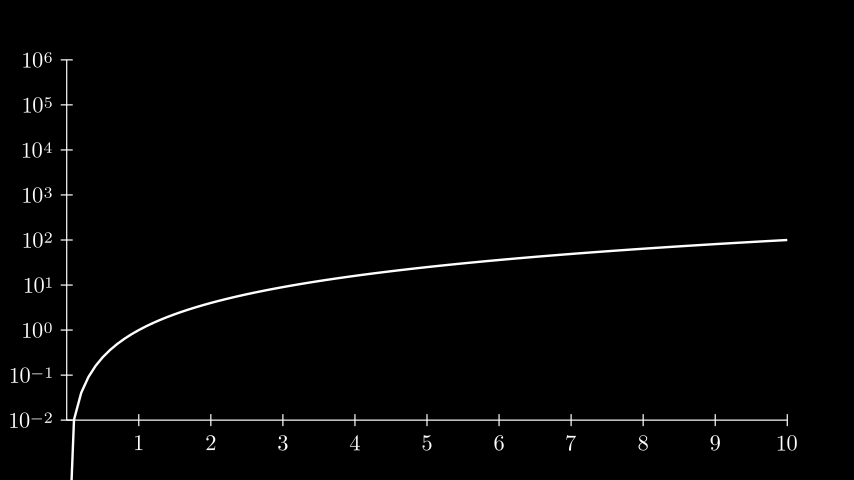

In [3]:
%%manim -v WARNING --disable_caching -ql -s LogScalingExample

class LogScalingExample(Scene):
    def construct(self):
        ax = Axes(
            x_range=[0, 10, 1],
            y_range=[-2, 6, 1],
            tips=False,
            axis_config={"include_numbers": True},
            y_axis_config={"scaling": LogBase(custom_labels=True)},
        )

        # x_min must be > 0 because log is undefined at 0.
        graph = ax.plot(lambda x: x ** 2, x_range=[0.001, 10], use_smoothing=False)
        self.add(ax, graph)

Manim Community v0.19.0

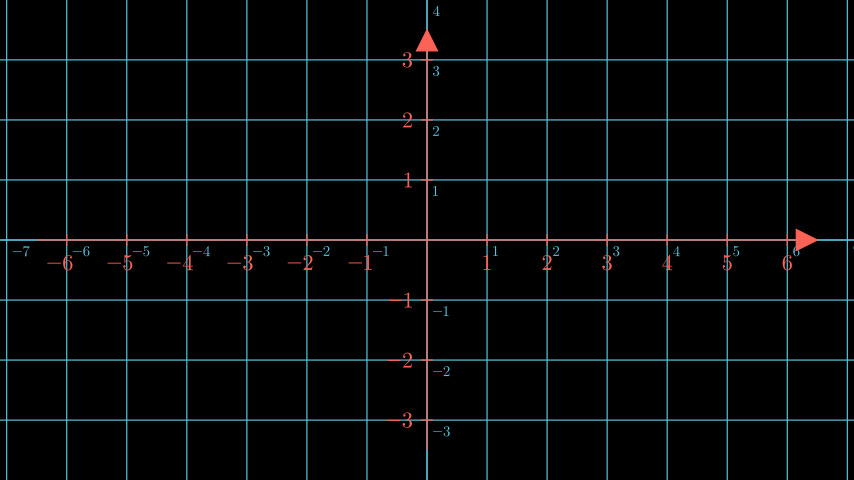

In [19]:
%%manim -v WARNING --disable_caching -ql -s coords

class coords(Scene):
    def construct(self):
        bgnpl = NumberPlane().add_coordinates().set_color(BLUE)
        self.add(bgnpl)

        stdaxes = Axes().add_coordinates().set_color(YELLOW)
        #self.add(stdaxes)

        newaxes = Axes(
            x_range=[-6.5,6.5,1],
            x_length=13,
            y_range=[-3.5,3.5,1],
            y_length=7,
        ).add_coordinates().set_color(RED)
        self.add(newaxes)

        miniaxes = Axes(
            x_range=[-200,200,50],
            x_length=6,
            y_range=[-200,200,100],
            y_length=4,
            tips=False
        ).add_coordinates().set_color(GREEN)
        miniaxes.shift(newaxes.c2p(3,1)-miniaxes.c2p(0,0))
        #self.add(miniaxes)


Manim Community v0.19.0

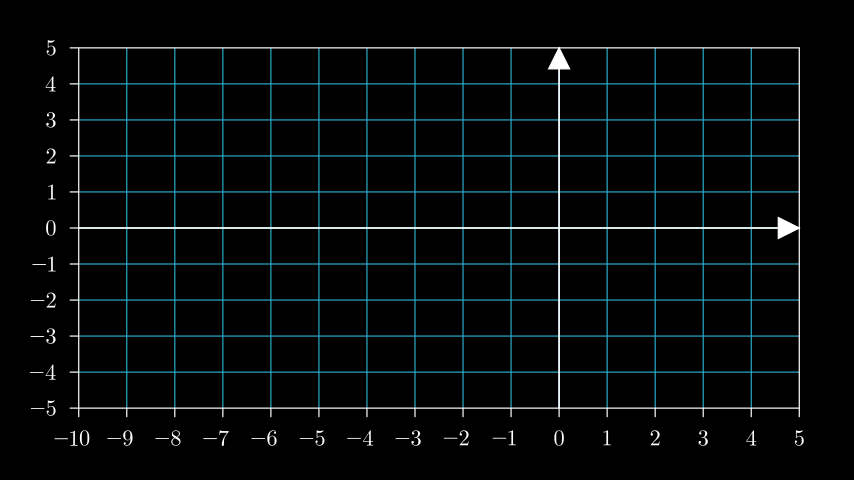

In [ ]:
%%manim -v WARNING --disable_caching -ql -s axes_and_numberplane

class axes_and_numberplane(Scene):
    def construct(self):

        def number_grid(xmin, xmax, xstep, ymin, ymax, ystep, include_tips=False): 
            axes = Axes(
                x_range=[xmin, xmax, xstep],
                y_range=[ymin, ymax, ystep],
                x_axis_config={
                    "include_numbers": True,
                    "include_ticks": False,
                    "numbers_to_exclude": (),
                    "numbers_to_include": np.arange(xmin, xmax + 1, xstep),
                    "include_tip": include_tips,
                },
                y_axis_config={
                    "include_numbers": True,
                    "include_ticks": False,
                    "numbers_to_exclude": (),
                    "numbers_to_include": np.arange(ymin, ymax + 1, ystep),
                    "include_tip": include_tips,
                },
            )

            grid = NumberPlane(
                x_range=[xmin, xmax, xstep],
                y_range=[ymin, ymax, ystep],
                x_length=axes.x_length,
                y_length=axes.y_length,
            )

            edge = SurroundingRectangle(
                grid,
                buff=0,
                color=WHITE,
                stroke_width=2,
            )

            left_x = grid.get_edge_center(LEFT)[0]
            bottom_y = grid.get_edge_center(DOWN)[1]

            vpad = 0.5
            hpad = 0.6

            x_nums = axes.x_axis.numbers
            y_nums = axes.y_axis.numbers

            x_nums.set_y(bottom_y - vpad)
            y_nums.set_x(left_x- hpad)

            def create_ticks(bottom_ticks, left_ticks):
                tick_length = 0.15
                tick_stroke = 2

                # x-axis ticks placed along the bottom border
                for v in np.arange(xmin, xmax + 1, xstep):
                    pt = grid.c2p(v, ymin)
                    tick = Line(
                        pt,
                        pt + tick_length * DOWN,
                        stroke_width=tick_stroke
                    )
                    bottom_ticks.add(tick)

                # y-axis ticks placed along the left border
                for v in np.arange(ymin, ymax + 1, ystep):
                    pt = grid.c2p(xmin, v)
                    tick = Line(
                        pt,
                        pt + tick_length * LEFT,
                        stroke_width=tick_stroke
                    )
                    left_ticks.add(tick)

            bottom_ticks = VGroup()
            left_ticks   = VGroup()
            create_ticks(bottom_ticks, left_ticks)

            offset = 0.2

            group = VGroup(grid, edge, axes, bottom_ticks, left_ticks)
            group.shift(offset * UP + offset * RIGHT)

            return group

        grid = number_grid(-10, 5, 1, -5, 5, 1)
        self.add(grid)

Manim Community v0.19.0

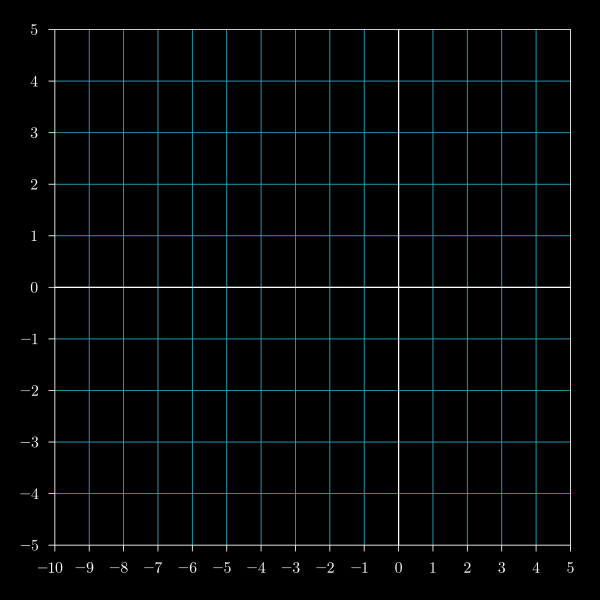

In [ ]:
%%manim -v WARNING --disable_caching -ql -s numberplane

class numberplane(Scene):
    def construct(self):

        def number_grid(xmin, xmax, xstep, ymin, ymax, ystep, include_tips=False):
            aspect = config.pixel_width / config.pixel_height
            config.frame_height = config.frame_width / aspect

            grid = NumberPlane(
                x_range=[xmin, xmax, xstep],
                y_range=[ymin, ymax, ystep],
                x_length=config.frame_width  - 2,
                y_length=config.frame_height - 2,
                x_axis_config={
                    "include_numbers": True,
                    "numbers_to_exclude": (),
                    "numbers_to_include": np.arange(xmin, xmax + 1, xstep),
                    "label_direction": ORIGIN,
                    "font_size": 36,
                    "stroke_width": 3,
                    "include_tip": include_tips,
                },
                y_axis_config={
                    "include_numbers": True,
                    "numbers_to_exclude": (),
                    "numbers_to_include": np.arange(ymin, ymax + 1, ystep),
                    "label_direction": ORIGIN,
                    "font_size": 36,
                    "stroke_width": 3,
                    "include_tip": include_tips,
                },
            )

            # corners of the grid in scene coordinates
            lower_left = grid.c2p(xmin, ymin)
            upper_right = grid.c2p(xmax, ymax)

            # center + size from those corners
            center = (lower_left + upper_right) / 2
            width = abs(upper_right[0] - lower_left[0])
            height = abs(upper_right[1] - lower_left[1])

            edge = Rectangle(
                width=width,
                height=height,
                stroke_color=WHITE,
                stroke_width=2,
            ).move_to(center)

            left_x = grid.get_edge_center(LEFT)[0]
            bottom_y = grid.get_edge_center(DOWN)[1]

            vpad = 0.4
            hpad = 0.2

            x_nums = grid.x_axis.numbers
            y_nums = grid.y_axis.numbers

            x_nums.set_y(bottom_y - vpad)
            y_nums.set_x(left_x- hpad)

            def create_ticks(bottom_ticks, left_ticks):
                tick_length = 0.15
                tick_stroke = 2

                # x-axis ticks placed along the bottom border
                for v in np.arange(xmin, xmax + 1, xstep):
                    pt = grid.c2p(v, ymin)
                    tick = Line(
                        pt,
                        pt + tick_length * DOWN,
                        stroke_width=tick_stroke
                    )
                    bottom_ticks.add(tick)

                # y-axis ticks placed along the left border
                for v in np.arange(ymin, ymax + 1, ystep):
                    pt = grid.c2p(xmin, v)
                    tick = Line(
                        pt,
                        pt + tick_length * LEFT,
                        stroke_width=tick_stroke
                    )
                    left_ticks.add(tick)

            bottom_ticks = VGroup()
            left_ticks   = VGroup()
            create_ticks(bottom_ticks, left_ticks)

            offset = 0.3

            group = VGroup(grid, edge, bottom_ticks, left_ticks, x_nums, y_nums)
            group.shift(offset * UP + offset * RIGHT)

            return group

        grid = number_grid(-10, 5, 1, -5, 5, 1)
        self.add(grid)